In [1]:
import numpy as np
import math
import scipy
from bokeh.io import show, output_notebook
from bokeh.plotting import figure
import matplotlib.pyplot as plt



Partie 1

In [2]:
L = 40#parametre de discretisation 
x = np.zeros([L+1,L+1])
for i in range (0,L+1):
    for j in range(0,L+1):
        x = [i/L,j/L] 
x = np.zeros([L+1,L+1])
def f(i,j):#coditions aux bord
    if i==0 or i==L:
        return 1
    else:
        return 0

In [3]:
K = 10# nombre d'itération 
def monte_carlo(i,j,stop=1000):
    s=0
    e=0
    for k in range(0,K):
        u=np.zeros(2)
        u = [i,j]
        for l in range (0,stop):
            if u[0]==0 or u[0]==L or u[1]==0 or u[1]==L:
                break
            a = np.random.binomial(1,1/2,2)
            u = u+2*a-1
        if l<stop:
            s = s+f(u[0],u[1])
        else:
            e = e+1

    return s/(K-e)

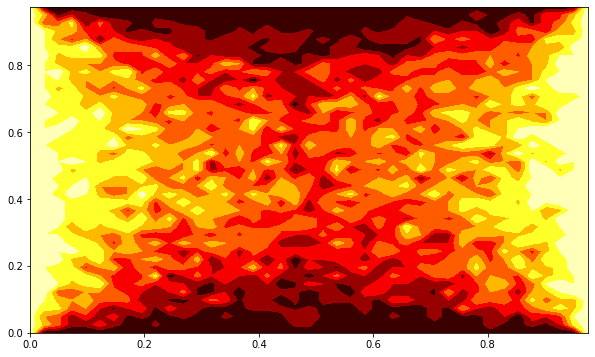

In [4]:
s = np.zeros([L+1,L+1])
for i in range(0,L+1):
    for j in range(0,L+1):
        s[j,i] = monte_carlo(i,j)
plt.figure(figsize=(10,6))
u = np.arange(0,1,1/(L+1))
plt.contourf(u,u,s,cmap=plt.cm.hot)
plt.show()

En comparant avec la figure donnée, ce resultat n'est pas mal.

Partie 2

In [5]:
L = 15#parametre de discretisation 
x = np.zeros([L+1,L+1])
for i in range (0,L+1):
    for j in range(0,L+1):
        x = [i/L,j/L] 
x = np.zeros([L+1,L+1])
def f(i,j):#coditions aux bord
    if i==0 or i==L:
        return 1
    else:
        return 0

In [6]:
def marche(i,j,alpha):
    #this function simulates one step of the random walk form the point (i,j)
    x = np.random.binomial(1,alpha,1)
    if x==1:
        return [-2,-2]
    a = np.random.binomial(1,1/2,2)
    return [i,j]+2*a-1

In [7]:
K=10
def monte_carlo_mod(i,j,alpha,stop=1000):
    s=0
    e=0#nombre d'echec -- le particule ne touche pas le bord en stop=1000 pas
    for k in range(0,K):
        u=np.zeros(2)
        u = [i,j]
        flag = 0
        for l in range (0,stop):
            if u[0]==0 or u[0]==L or u[1]==0 or u[1]==L:
                break
            u = marche(u[0],u[1],alpha)
            if u[0]==-2:
                flag=1
                break
        if l<stop and flag==0:
            s = s+f(u[0],u[1])
        else:
            e =e+1
    return s/(K-e)

gamma= 2


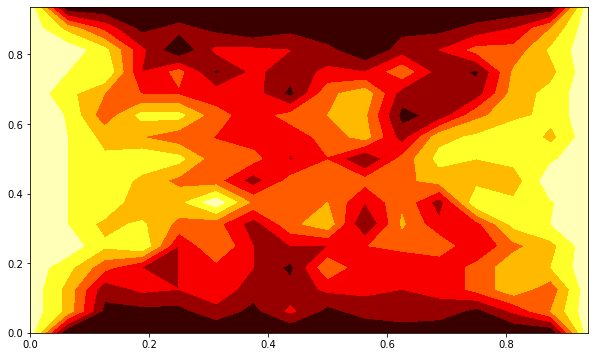

gamma= 4


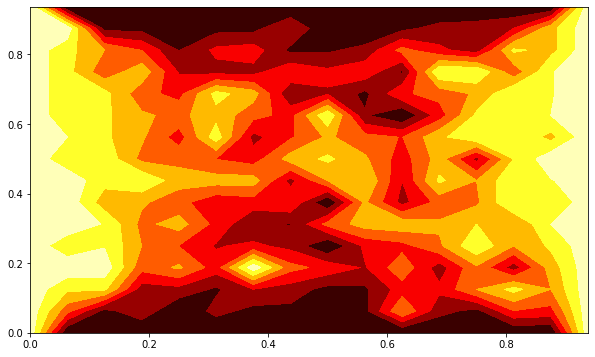

gamma= 6


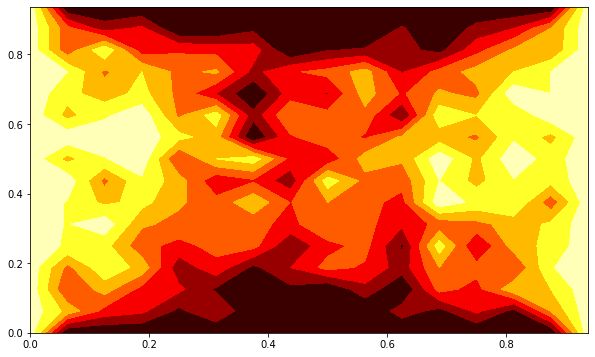

In [8]:
for i in range (1,4):
    gamma = i*2
    alpha = gamma/(2*L**2) #on est dans dimension 2..
    s = np.zeros([L+1,L+1])
    for i in range(0,L+1):
        for j in range(0,L+1):
            s[j,i] = monte_carlo_mod(i,j,alpha)
    print("gamma=",gamma)
    plt.figure(figsize=(10,6))
    u = np.arange(0,1,1/(L+1))
    plt.contourf(u,u,s,cmap=plt.cm.hot)
    plt.show()

Partie 3

Le but de cette partie est de résoudre l'équation
\begin{equation}
x, y \in \mathbb{D}, \quad \partial_{x}^{2} f(x, y)+\partial_{y}^{2} f(x, y)-2 f(x, y)+f(x, y)^{2}=0,
\end{equation}
avec la méthode de monte-carlo.

Pour cela, il suffit de considérer pour chaque point (i,j) une marche aléatoire qui commence de (i,j) et qui fait à chaque étape:

soit marcher un pas en haut/bas/gauche/droit avec chacune une probabilité $\frac{1-\alpha-\beta}{4}$, 

soit disparaitre avec une probabilité $\alpha$,

soit se scinder en deux mais rester sur le même point (i,j) avec une probabilité $\beta$.

Supposons qu'à un moment donné tous les branches touchent le bord, appelons ces points $\{p_1,\cdots,p_n\}$, alors on calcule $\prod_{i=1}^{n}f(p_i)$.

On effectue plusieurs realisation et prend la moyenne de ce terme comme estimation de  la valeur de f(i,j).

Ici pour être en accord avec les constantes dans l'équation on va prendre 
\begin{equation}
\alpha=\beta=\frac{1}{2L^2}.
\end{equation}

In [9]:
L = 40#parametre de discretisation 
x = np.zeros([L+1,L+1])
for i in range (0,L+1):
    for j in range(0,L+1):
        x = [i/L,j/L] 
x = np.zeros([L+1,L+1])

def f(i,j):#coditions aux bord
    if i==0 or i==L:
        return 1
    else:
        return 0

In [10]:
def mcqc(i,j,alpha,beta,stop):
    #for a fixed point this function calculates one sample  of the random walk described above
    if i==0 or i==L or j==0 or j==L:
        return f(i,j)
    x = np.random.binomial(1,alpha,1)
    if x==1:
        return 0
    x = np.random.binomial(1,beta/(1-alpha),1)
    if x==1:
        a = mcqc(i,j,alpha,beta,stop)
        b = mcqc(i,j,alpha,beta,stop)
        return a*b
    a = np.random.binomial(1,1/2,2)
    u = [i,j]+2*a-1
    return mcqc(u[0],u[1],alpha,beta,stop)

In [11]:
K=10
def monte_carlo_quad(i,j,alpha,beta,stop=10000):
    #this function takes avereage
    s=0
    e=0#nombre d'echec -- le particule ne touche pas le bord en stop=1000 pas
    for k in range(0,K):
        s = s+mcqc(i,j,alpha,beta,stop)
    return s/(K-e)

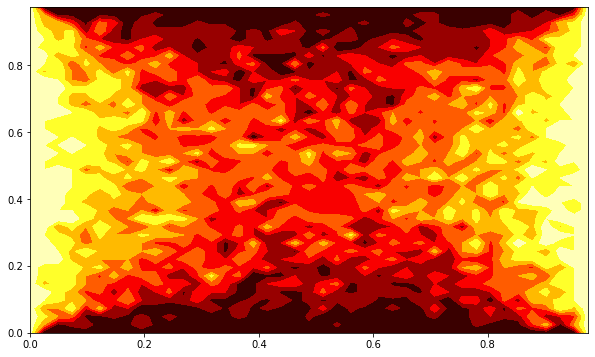

In [12]:
s = np.zeros([L+1,L+1])
alpha = 1/(2*L**2)
beta = alpha
for i in range(0,L+1):
    for j in range(0,L+1):
        s[j,i] = monte_carlo_quad(i,j,alpha,beta)
plt.figure(figsize=(10,6))
u = np.arange(0,1,1/(L+1))
plt.contourf(u,u,s,cmap=plt.cm.hot)
plt.show()